In [24]:
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://geodata.nationaalgeoregister.nl/asbestscholenkaart/wfs?service=WFS"

# See details about this particular WFS
# -------------------------------------

# Initialize
wfs = WebFeatureService(url=url)

# Service provider 
print(wfs.identification.title)

# Get WFS version
print(wfs.version)

# Available methods
print([operation.name for operation in wfs.operations])

# Available data layers
print(list(wfs.contents))

# Print all metadata of all layers
for layer, meta in wfs.items():
    print(meta.__dict__)

In [1]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://geodata.nationaalgeoregister.nl/inspireadressen/wfs"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layer = list(wfs.contents)[-1]

# Specify the parameters for fetching the data
params = dict(service='WFS', request='GetFeature',
      typeName="inspireadressen:inspireadressen",StartIndex='0', outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url
q
# Read data from URL
data2 = gpd.read_file(q)
data2

,id,straatnaam,huisnummer,huisletter,toevoeging,woonplaats,postcode,geometry
0,inspireadressen.1,Kalf R,33,None,ROOD,Zaandam,1509AC,POINT (117697.783 498333.669)
1,inspireadressen.2,Kalf R,34,None,ROOD,Zaandam,1509AC,POINT (117717.252 498337.207)
2,inspireadressen.3,Kalf R,37,None,ROOD,Zaandam,1509AC,POINT (117771.614 498348.506)
3,inspireadressen.4,Kalf R,42,None,ROOD,Zaandam,1509AC,POINT (117855.293 498367.828)
4,inspireadressen.5,Kalf R,43,None,ROOD,Zaandam,1509AC,POINT (117872.030 498371.476)
...,...,...,...,...,...,...,...,...
14995,inspireadressen.14996,Burensedijk,17,D,None,Zoelen,4011KG,POINT (155343.444 436596.194)
14996,inspireadressen.14997,Burensedijk,17,C,None,Zoelen,4011KG,POINT (155333.955 436593.987)
14997,inspireadressen.14998,Burensedijk,17,B,None,Zoelen,4011KG,POINT (155323.250 436593.186)
14998,inspireadressen.14999,Burensedijk,17,A,None,Zoelen,4011KG,POINT (155312.873 436587.149)


In [3]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService
def wfs_kadaster(url,type_param):
 wfs = WebFeatureService(url=url)
 layer = list(wfs.contents)[-1]
 params = dict(service='WFS', request='GetFeature',typeName=type_param ,StartIndex='0', outputFormat='json')
 q = Request('GET', url, params=params).prepare().url
 return gpd.read_file(q)


In [4]:
data = wfs_kadaster("https://geodata.nationaalgeoregister.nl/bestuurlijkegrenzen/wfs","bestuurlijkegrenzen:gemeenten")


In [11]:
data
plaats = 'Groningen'
plaatsdata = data.loc[data['gemeentenaam'] == plaats]

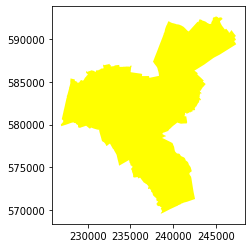

In [13]:
plaatsdata.plot(color='yellow')